In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
from pandas_datareader import DataReader

In [0]:
from datetime import datetime

In [0]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [0]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [0]:
for stock in tech_list:
  globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,233.388294,229.282778,231.144404,231.525198,2.846392e+07,230.114993
std,45.181698,44.386090,44.734389,44.926026,1.061513e+07,45.518025
min,173.070007,169.500000,170.320007,172.500000,1.136200e+07,170.271317
25%,200.274994,197.340004,198.679993,199.017494,2.111072e+07,196.745834
50%,213.500000,210.129997,210.885002,210.440002,2.622035e+07,209.119019
75%,266.169991,262.572495,264.227509,264.747498,3.257048e+07,264.120651
max,327.850006,323.350006,324.739990,327.200012,7.983450e+07,327.200012


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-02-28 to 2020-02-27
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


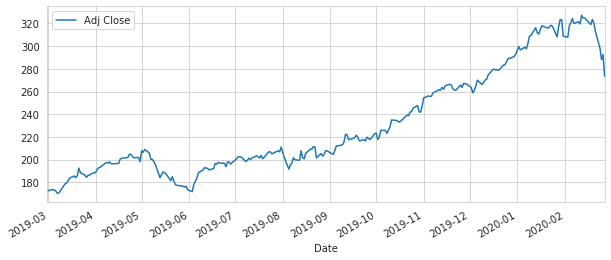

In [13]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

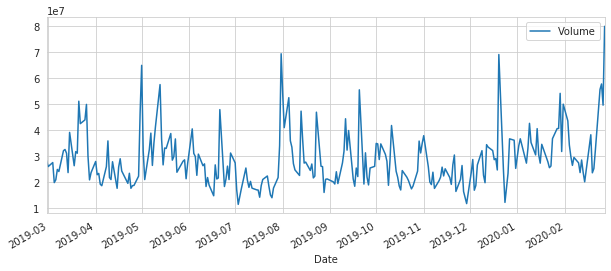

In [14]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))